# Machine Learning Exercise 1 - Linear Regression

## Linear regression with one variable

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, linear_model

%matplotlib inline

In [2]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


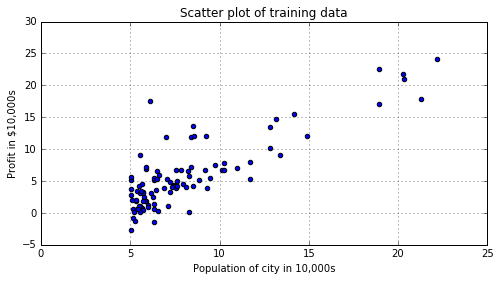

In [4]:
ax = data.plot(kind='scatter', x='Population', y='Profit', title='Scatter plot of training data', figsize=(8,4),grid=True);
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')

## Gradient Descent

First, you create a function to compute the cost of a given solution (characterized by the parameters beta):

In [5]:
def compute_cost(X, y, beta):
    m = len(X)
    hb = np.power((X.dot(beta.T) - y),2)#multiplication matrix .dot
    return np.sum(hb) / (2 * m)    

We store each example as a row in the X matrix. To take into account the intercept term (\beta0), we add an additional first column to X and set it to all ones. This allows us to treat \beta0 as simply another 'feature'.

In [6]:
data.insert(0, 'beta zero', 1)

Now let's do some variable initialization

In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

Now, you need to guarantee that X (training set) and y (target variable) are correct.

In [8]:
X.head()

,beta zero,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


The cost function is expecting numpy matrices so we need to convert X and y before we can use them. We also need to initialize beta.

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
beta = np.matrix(np.array([0,0]))

Here's what beta looks like.

In [11]:
beta

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.

In [12]:
X.shape, beta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for beta).

In [13]:
compute_cost(X, y, beta)

32.072733877455676

Now, you are asked to define a function to perform gradient descent on the parameters beta

In [14]:
def gradient_descent(X, y, theta, alpha, iters):
    '''
    alpha: learning rate
    iters: number of iterations
    OUTPUT:
    theta: learned parameters
    cost:  a vector with the cost at each training iteration
    '''
    temp       = np.matrix(np.zeros(theta.shape)) #np.zero: Return a new array of given shape and type, filled with zeros.
    parameters = int(theta.ravel().shape[1]) #Return a contiguous flattened array and return a tuple of array dimensions axis 1
    cost       = np.zeros(iters) 
    n = len(X)
    for i in range(iters):        
        for j in range(parameters):
            gradient = np.multiply((X.dot(theta.T) - y),X[:,j])
            temp[0,j] -= (alpha/(n)) * np.sum(gradient) 
            
        theta = temp #update
        cost[i] = compute_cost(X, y, theta)        
    return theta, cost

Initialize some additional variables - the learning rate alpha, and the number of iterations to perform

In [15]:
alpha = 0.01
iters = 1500

Now let's run the gradient descent algorithm to fit our parameters theta to the training set.

In [16]:
g, cost = gradient_descent(X, y, beta, alpha, iters)
print ("Coeficiente angular da função")
print (g)
print ("\nResiduos")
print cost

Coeficiente angular da função
[[-3.63609474  1.16699229]]

Residuos
[ 6.73719046  5.93238265  5.90102959 ...,  4.48315549  4.48313304
  4.48311066]


Finally we can compute the cost (error) of the trained model using our fitted parameters.

In [17]:
print ("Error do treino")
compute_cost(X, y, g)

Error do treino


4.483110660040591

Now let's plot the linear model along with the data to visually see how well it fits.

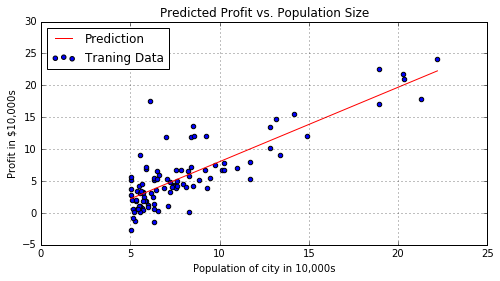

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Predicted Profit vs. Population Size')
ax.grid(True)

Looks pretty good! Remember that the gradient decent function also outputs a vector with the cost at each training iteration, we can plot it as well. 

Since the cost always decreases - this is an example of a convex optimization problem.

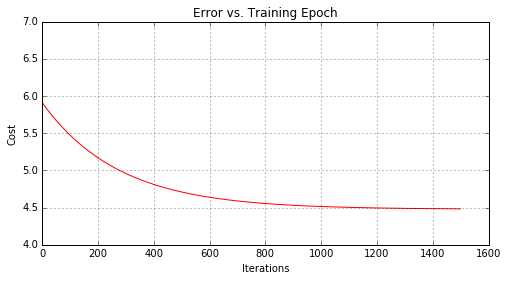

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(4.0)
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

Now, we will show a contour plot that presents beta0 against beta1 and the outcome of J. First, we set values for beta0 and beta1

In [20]:
beta0_vals = np.linspace(-10, 10, 100)
beta1_vals = np.linspace(-1, 4, 100)

Now, initialize J values to a matrix of 0's

In [21]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals)])

In [22]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix(np.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

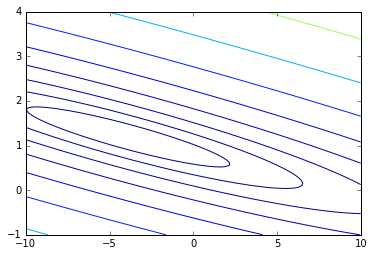

In [23]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

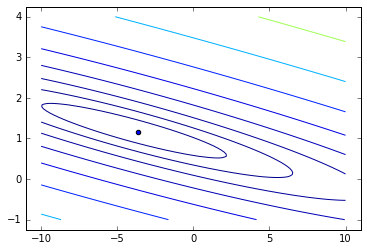

In [24]:
plt.scatter(g[0,0],g[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

Now, in 3D

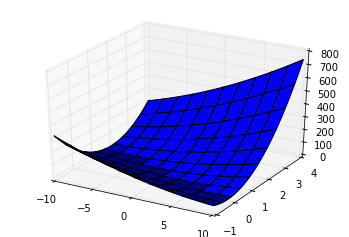

In [25]:
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T);

## Linear regression with multiple variables

From now on, you will use the second dataset, i.e., ex1data2.txt. This is a housing price dataset with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house). You are asked to use the techniques already applied to analyze that data set.

In [26]:
data2 = pd.read_csv('ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


For this task we add another pre-processing step - normalizing the features.

Notice that the scale of the values for each feature is vastly large. A house will typically have 2-5 bedrooms, but may have anywhere from hundreds to thousands of square feet. If we use the features as they are in the dataset, the 'size' feature would too much wheighted and would end up dwarfing any contributions from the 'number of bedrooms' feature. To fix this, we need to do something called 'feature normalization'. That is, we need to adjust the scale of the features to level the playing field. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation.

In [27]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Given that you were asked to implement both cost function and gradient descent using matrix operations, your previously implementations will work just fine in the multivariate dataset. Hence, you need now insert the 'ones' column as before and separate the X's and the y's.

Conduct the rest of this exercise by repeating the experiments conducted in the simple linear dataset...

In [28]:
data2.insert(0, 'Ones', 1)

In [29]:
cols = data2.shape[1]  
X2 = data2.iloc[:,0:cols-1]  
y2 = data2.iloc[:,cols-1:cols]

In [30]:
X2.head()

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [31]:
y2.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [32]:
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
beta2 = np.matrix(np.array([0,0,0]))  

In [33]:
beta2

matrix([[0, 0, 0]])

In [34]:
X2.shape, beta2.shape, y2.shape

((47, 3), (1, 3), (47, 1))

In [35]:
g2, cost2 = gradient_descent(X2, y2, beta2, alpha, iters)
print ("Coeficiente angular da função")
print (g2)
print ("\nResiduos")
print cost2

Coeficiente angular da função
[[ -9.99791266e-17   8.84056762e-01  -5.24711271e-02]]

Residuos
[ 0.4805491   0.47200469  0.46370085 ...,  0.1306867   0.1306867   0.1306867 ]


In [36]:
print "Erro do treino"
compute_cost(X2, y2, g2)

Erro do treino


0.13068669669956798

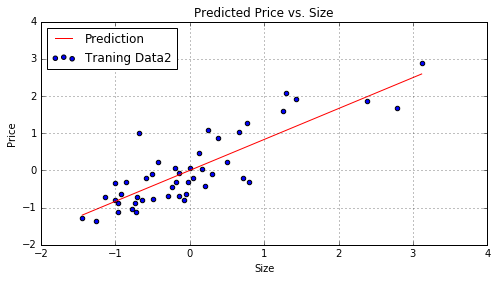

In [37]:
x = np.linspace(data2.Size.min(), data2.Size.max(), 100)
f = g2[0, 0] + (g2[0, 1] * x) + (g2[0, 2] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Size, data2.Price, label='Traning Data2')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Size')
ax.grid(True)

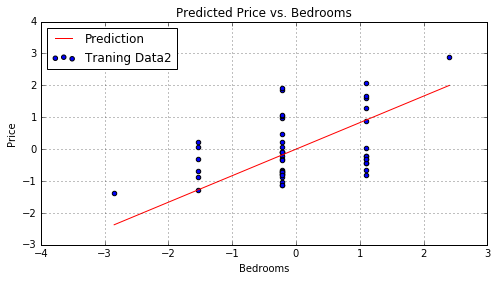

In [38]:
x = np.linspace(data2.Bedrooms.min(), data2.Bedrooms.max(), 100)
f = g2[0, 0] + (g2[0, 1] * x) + (g2[0, 2] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data2.Bedrooms, data2.Price, label='Traning Data2')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs. Bedrooms')
ax.grid(True)

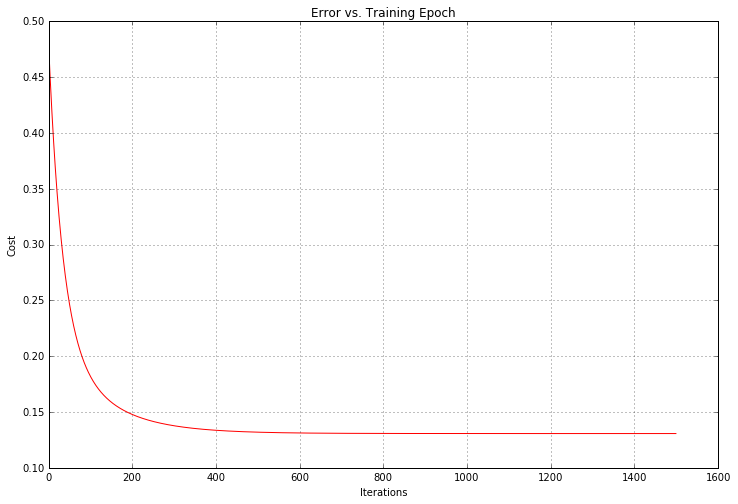

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

In [40]:
beta0_vals = np.linspace(-10, 10, 100)
beta1_vals = np.linspace(-1, 4, 100)

In [41]:
j_vals = np.zeros([len(beta0_vals), len(beta1_vals)])

In [42]:
for i in range(len(beta0_vals)):
    for j in range(len(beta1_vals)):
        t = np.matrix(np.array([beta0_vals[i], beta1_vals[j]]))
        j_vals[i,j] = compute_cost(X, y, t)

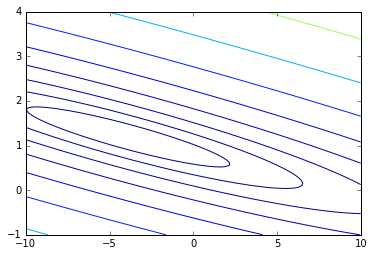

In [43]:
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

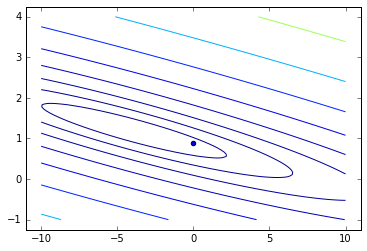

In [44]:
plt.scatter(g2[0,0],g2[0,1],)
plt.contour(beta0_vals, beta1_vals, j_vals.T, np.logspace(-2, 3, 20));

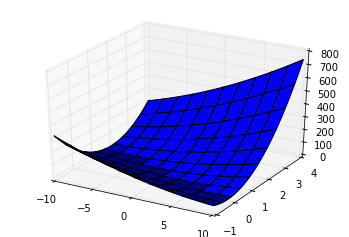

In [45]:
beta0_mesh, beta1_mesh = np.meshgrid(beta0_vals, beta1_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(beta0_mesh, beta1_mesh, j_vals.T);

## A real world dataset

In [46]:
import graphlab
graphlab.canvas.set_target('ipynb')

## Load groupon data

In [47]:
data3 = pd.read_csv('groupon-deals.csv')
data3.head()
cols = data3.shape[1]
data4 =data3.iloc[:,2:cols-10]
data4

,value,you_save,discount_pct,num_sold
0,30,15,50,108
1,70,35,50,255
2,99,54,55,352
3,65,35,54,501
4,134,67,50,359
5,155,70,45,45
6,150,75,50,210
7,20,10,50,163
8,10,5,50,823
9,50,25,50,3


In [48]:
data4 = (data4 - data4.mean()) / data4.std()
data4.head()


,value,you_save,discount_pct,num_sold
0,-0.340996,-0.354025,-0.608165,-0.353680
1,-0.208339,-0.249447,-0.608165,-0.263808
2,-0.112163,-0.150097,-0.107899,-0.204505
3,-0.224921,-0.249447,-0.207952,-0.113411
4,0.003912,-0.082121,-0.608165,-0.200226


In [49]:
data4.insert(0, 'Ones', 1)

In [50]:
cols = data4.shape[1]  
X4 = data4.iloc[:,0:cols-1]  
y4 = data4.iloc[:,cols-1:cols]

In [51]:
X4.head()

,Ones,value,you_save,discount_pct
0,1,-0.340996,-0.354025,-0.608165
1,1,-0.208339,-0.249447,-0.608165
2,1,-0.112163,-0.150097,-0.107899
3,1,-0.224921,-0.249447,-0.207952
4,1,0.003912,-0.082121,-0.608165


In [52]:
y4.head()

,num_sold
0,-0.353680
1,-0.263808
2,-0.204505
3,-0.113411
4,-0.200226


In [53]:
X4 = np.matrix(X4.values)  
y4 = np.matrix(y4.values)  
beta4 = np.matrix(np.array([0,0,0,0]))  

In [54]:
g4, cost4 = gradient_descent(X4, y4, beta4, alpha, iters)
print ("Coeficiente angular da função")
print (g4)
print ("\nResiduos")
print cost4

Coeficiente angular da função
[[  2.37358393e-17  -9.09830831e-02   1.63258208e-02  -2.46783929e-02]]

Residuos
[ 0.49981988  0.49967694  0.49954005 ...,  0.49606231  0.49606215
  0.49606199]


In [55]:
print "Erro do treino"
compute_cost(X4, y4, g4)

Erro do treino


0.49606199117546113

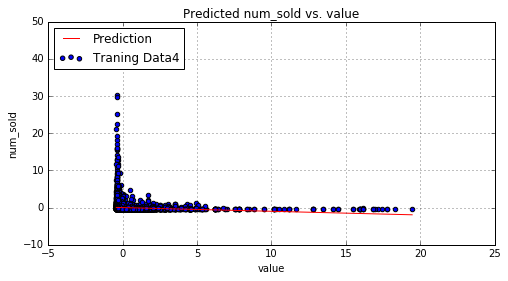

In [56]:
x = np.linspace(data4.value.min(), data4.value.max(), 100)
f = g4[0, 0] +  (g4[0, 1] * x) +  (g4[0, 2] * x) +  (g4[0, 3] * x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data4.value, data4.num_sold, label='Traning Data4')
ax.legend(loc=2)
ax.set_xlabel('value')
ax.set_ylabel('num_sold')
ax.set_title('Predicted num_sold vs. value')
ax.grid(True)

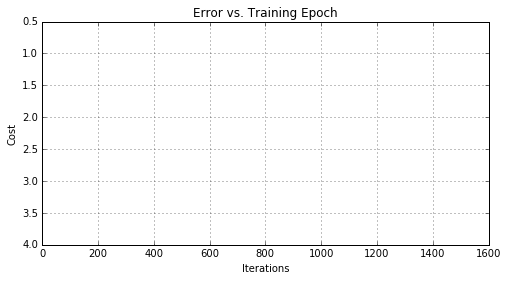

In [57]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iters), cost4, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_ylim(4.0)
ax.set_title('Error vs. Training Epoch')
ax.grid(True)